<a href="https://colab.research.google.com/github/ua-datalab/MLWorkshops/blob/main/Regression_Algorithms/MLRegressionAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical Machine Learning: Regression Algorithms.

Regression analysis is the process of estimating the relationship between a dependent variable and independent variables.

We load all the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import add_dummy_feature

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


## Linear Regression


In [ ]:
# Generate a collection of random points around a line y= 4 + 3*x
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector


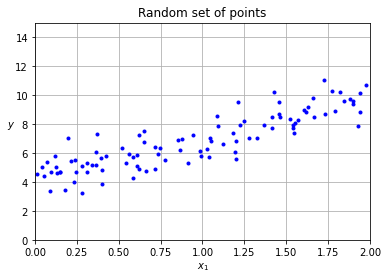

In [ ]:
# Plot previous generated data
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title('Random set of points')
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()


In [ ]:
# Using Linear Algebra to solve the best parameters (Intersection & Slope)
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best


array([[4.21509616],
       [2.77011339]])

In [ ]:
# Predict y values for X=0 and 2
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict


array([[4.21509616],
       [9.75532293]])

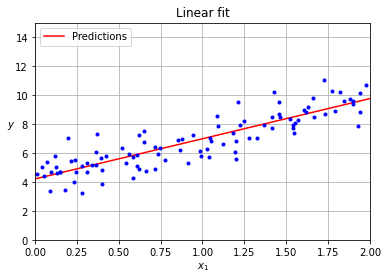

In [ ]:
# Plot predicted linear function
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.title('Linear fit')
plt.show()


In [ ]:
# Now use Linear Regression Algorithm
# Will return the intercept and slope

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [ ]:
# Predict again y values for X=0 and 2.
lin_reg.predict(X_new)


array([[4.21509616],
       [9.75532293]])

In [ ]:
# Old way: using Least Squares fit for finding intercept and slope
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd


array([[4.21509616],
       [2.77011339]])

In [ ]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## Gradient Descent Method

In [ ]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients


In [ ]:
# Trained model parameters
theta


array([[4.21509616],
       [2.77011339]])

In [ ]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

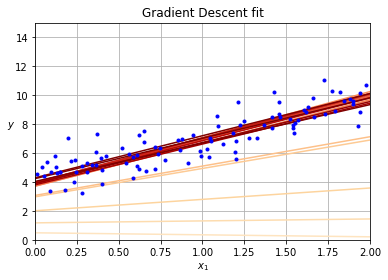

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies figure
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title('Gradient Descent fit')
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()


In [ ]:
# Found parameters: Intercept & Slope
theta


array([[4.21076011],
       [2.74856079]])

In [ ]:
# Now use the SDGRegressor Algorithm


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
# Returned parameters: Intercept and Slope

sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Polynomial Regression

In [ ]:
# Generate a collection of data around y = 2 + X + (1/2) X**2
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)


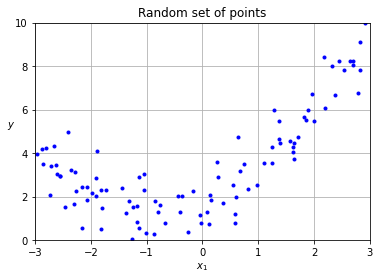

In [ ]:
# Generate plot for collection of points
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title('Random set of points')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()


In [ ]:
# Use the Polynomial Regression Algorithm

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]


array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

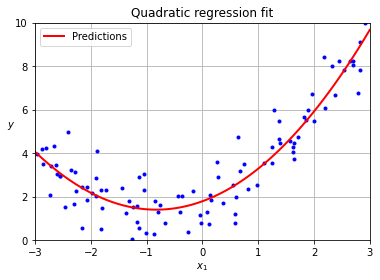

In [ ]:
# Plot quadratic prediction fit
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title('Quadratic regression fit')
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()


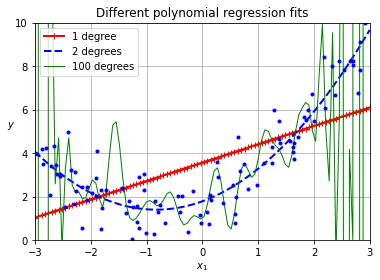

In [ ]:
# Make polynomial plot and compare different fits

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 100)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)

    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title('Different polynomial regression fits')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()


# Regularized Linear Models

## Ridge Regression

In [ ]:
# Generate random noise about y = 1 + (1/2) X
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


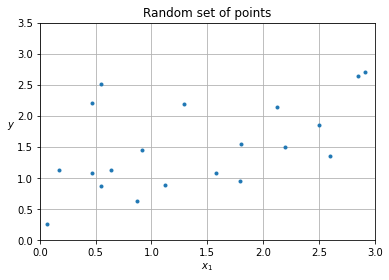

In [ ]:
# quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.title('Random set of points')
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()


In [ ]:
# Ridge Regression Algorithm

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[1.55325833]])

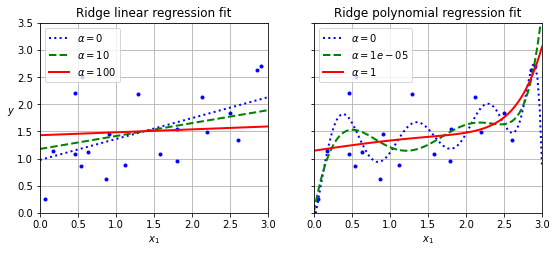

In [ ]:
# Plot for different values of alpha

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.title('Ridge linear regression fit')
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.title('Ridge polynomial regression fit')
plt.show()

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])


array([1.55302613])

In [ ]:
# show that we get roughly the same solution as earlier when
# we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[1.55321535]])

In [ ]:
ridge_reg.intercept_, ridge_reg.coef_


(array([0.97944909]), array([[0.38251084]]))

## Lasso Regression

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

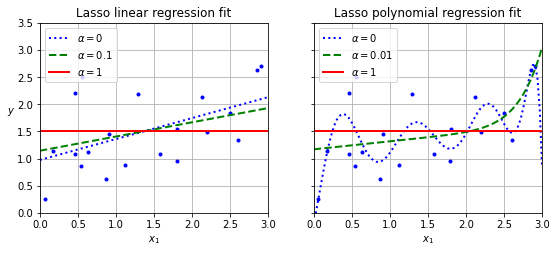

In [ ]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.title('Lasso linear regression fit')
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.title('Lasso polynomial regression fit')
plt.show()


## Elastic Net

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Logistic Regression

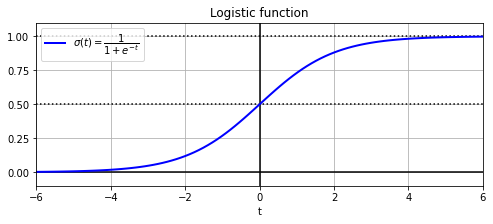

In [ ]:
# Estimating Probabilities
# Logistic Function Plot

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.title('Logistic function')
plt.grid()
plt.show()

## Metrics for Regression


>1.0, 1.0 = 0.000
>1.0, 0.9 = 0.010
>1.0, 0.8 = 0.040
>1.0, 0.7 = 0.090
>1.0, 0.6 = 0.160
>1.0, 0.5 = 0.250
>1.0, 0.4 = 0.360
>1.0, 0.3 = 0.490
>1.0, 0.2 = 0.640
>1.0, 0.1 = 0.810
>1.0, 0.0 = 1.000


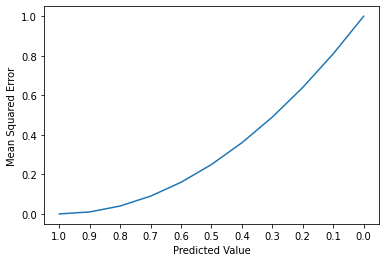

In [ ]:
# example of increase in mean squared error

from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])**2
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

In [ ]:
# example of calculate the root mean squared error

from sklearn.metrics import mean_squared_error
# real value
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# calculate errors
errors = mean_squared_error(expected, predicted, squared=False)
# report error
print(errors)

0.5916079783099616


>1.0, 1.0 = 0.000
>1.0, 0.9 = 0.100
>1.0, 0.8 = 0.200
>1.0, 0.7 = 0.300
>1.0, 0.6 = 0.400
>1.0, 0.5 = 0.500
>1.0, 0.4 = 0.600
>1.0, 0.3 = 0.700
>1.0, 0.2 = 0.800
>1.0, 0.1 = 0.900
>1.0, 0.0 = 1.000


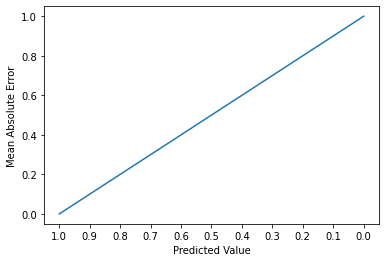

In [ ]:
# plot of the increase of mean absolute error with prediction error

from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()


In [ ]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
# real value
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# calculate errors
errors = mean_absolute_error(expected, predicted)
# report error
print(errors)


0.5


In [ ]:
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print('1. ', r2_score(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print('2. ',r2_score(y_true, y_pred,
         multioutput='variance_weighted'))

y_true = [1, 2, 3]
y_pred = [1, 2, 3]
print('3. ', r2_score(y_true, y_pred))

y_true = [1, 2, 3]
y_pred = [2, 2, 2]
print('4. ', r2_score(y_true, y_pred))

y_true = [1, 2, 3]
y_pred = [3, 2, 1]
print('5. ', r2_score(y_true, y_pred))

y_true = [-2, -2, -2]
y_pred = [-2, -2, -2]
print('6. ', r2_score(y_true, y_pred))


y_true = [-2, -2, -2]
y_pred = [-2, -2, -2 + 1e-8]
print('7. ', r2_score(y_true, y_pred))



1.  0.9486081370449679
2.  0.9382566585956417
3.  1.0
4.  0.0
5.  -3.0
6.  1.0
7.  0.0


In [ ]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print('1. ', mean_absolute_error(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print('2. ',mean_absolute_error(y_true, y_pred))

print('3. ', mean_absolute_error(y_true, y_pred, multioutput='raw_values'))

print('4. ', mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7]))


1.  0.5
2.  0.75
3.  [0.5 1. ]
4.  0.85


In [ ]:
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print('1. ', mean_squared_error(y_true, y_pred))

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print('2. ',mean_squared_error(y_true, y_pred, squared=False))

y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
print('3. ', mean_squared_error(y_true, y_pred))

print('4. ', mean_squared_error(y_true, y_pred, squared=False))

print('5. ',mean_squared_error(y_true, y_pred, multioutput='raw_values'))

print('6. ', mean_squared_error(y_true, y_pred, multioutput=[0.3, 0.7]))


1.  0.375
2.  0.6123724356957945
3.  0.7083333333333334
4.  0.8227486121839513
5.  [0.41666667 1.        ]
6.  0.825


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print('1. ',mean_absolute_percentage_error(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print('2. ', mean_absolute_percentage_error(y_true, y_pred))

print('3. ', mean_absolute_percentage_error(y_true, y_pred, multioutput=[0.3, 0.7]))

# the value when some element of the y_true is zero is arbitrarily high because
# of the division by epsilon
y_true = [1., 0., 2.4, 7.]
y_pred = [1.2, 0.1, 2.4, 8.]
print('4. ', mean_absolute_percentage_error(y_true, y_pred))


1.  0.3273809523809524
2.  0.5515873015873016
3.  0.6198412698412699
4.  112589990684262.48


In [ ]:
from sklearn.metrics import median_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print('1. ', median_absolute_error(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print('2. ', median_absolute_error(y_true, y_pred))

print('3. ', median_absolute_error(y_true, y_pred, multioutput='raw_values'))

print('4. ', median_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7]))


1.  0.5
2.  0.75
3.  [0.5 1. ]
4.  0.85


In [ ]:
from sklearn.metrics import max_error

y_true = [3, 2, 7, 1]
y_pred = [5, 2, 7, 1]
max_error(y_true, y_pred)


2